# Lending Club EDA

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loan_2014 data

In [123]:
df = pd.read_csv('/Users/nzhang/OneDrive/Data/lending_club/FinTech_data/loan_2014.csv') 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
cols = df.columns.values

## Last two rows are invalid

In [125]:
df.tail()

,taxliens,totalbalexmort,maxbalbc,totcurbal,desc,revolbal,mthssincelastdelinq,mortacc,delinq2yrs,zipcode,...,intrate,openil6m,numsats,totalacc,inqlast12m,tothicredlim,openrv12m,openacc,issued,loanstatus
235626,0.0,50896.0,NaN,591610.0,NaN,11404.0,13.0,2.0,3.0,913xx,...,7.90%,NaN,21.0,27.0,NaN,640841.0,NaN,21.0,Jan-2014,Fully Paid
235627,0.0,73598.0,NaN,73598.0,Borrower added on 12/06/13 > I am going to c...,6688.0,65.0,3.0,0.0,458xx,...,16.99%,NaN,18.0,43.0,NaN,96582.0,NaN,18.0,Jan-2014,Current
235628,0.0,57477.0,NaN,57477.0,Borrower added on 12/04/13 > I will like a l...,11325.0,9.0,2.0,1.0,950xx,...,19.20%,NaN,6.0,22.0,NaN,81470.0,NaN,6.0,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 19 object, 76 numeric (but 18 of them are all Nulls, 13 of them have Nulls)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Data columns (total 95 columns):
taxliens                      235629 non-null float64
totalbalexmort                235629 non-null float64
maxbalbc                      0 non-null float64
totcurbal                     235629 non-null float64
desc                          15279 non-null object
revolbal                      235629 non-null float64
mthssincelastdelinq           119748 non-null float64
mortacc                       235629 non-null float64
delinq2yrs                    235629 non-null float64
zipcode                       235629 non-null object
mosinoldrevtlop               235629 non-null float64
mthssincelastmajorderog       66478 non-null float64
openil12m                     0 non-null float64
numbctl                       235629 non-null float64
term                          235629 non-null object
pubrec                        235629 non-null float64
bcutil                        233018 non

## Find all_null_feature, num_feature, ob_feature

In [127]:
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)
    

In [128]:
print(len(num_feature), len(ob_feature))
print(len(all_null_feature))

58 19
18


In [129]:
all_null_feature

['maxbalbc',
 'openil12m',
 'totalbalil',
 'verificationstatusjoint',
 'allutil',
 'mthssincercntil',
 'totalcutl',
 'ilutil',
 'annualincjoint',
 'memberid',
 'openacc6m',
 'openrv24m',
 'inqfi',
 'openil24m',
 'dtijoint',
 'openil6m',
 'inqlast12m',
 'openrv12m']

In [130]:
ob_feature

['desc',
 'zipcode',
 'term',
 'grade',
 'addrstate',
 'subgrade',
 'revolutil',
 'applicationtype',
 'homeownership',
 'purpose',
 'initialliststatus',
 'earliestcrline',
 'emplength',
 'verificationstatus',
 'emptitle',
 'id',
 'intrate',
 'issued',
 'loanstatus']

In [131]:
i=0
feat = ob_feature[i]
print(feat)

desc


In [132]:
print(df[feat].isnull().sum())
df[feat].value_counts()

220352


  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                             11
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                             10
  Borrower added on 02/19/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                         

In [133]:
i=1
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

zipcode
2


750xx    2546
945xx    2418
112xx    2382
606xx    2273
300xx    2085
070xx    1936
331xx    1929
100xx    1912
770xx    1795
900xx    1787
117xx    1700
917xx    1685
104xx    1654
891xx    1635
330xx    1606
852xx    1528
921xx    1427
913xx    1391
926xx    1355
925xx    1315
604xx    1272
080xx    1267
600xx    1250
601xx    1242
481xx    1235
334xx    1230
113xx    1218
853xx    1135
956xx    1114
920xx    1106
         ... 
889xx       1
833xx       1
901xx       1
511xx       1
513xx       1
821xx       1
682xx       1
008xx       1
353xx       1
888xx       1
500xx       1
527xx       1
093xx       1
680xx       1
909xx       1
685xx       1
663xx       1
516xx       1
854xx       1
929xx       1
861xx       1
832xx       1
938xx       1
429xx       1
836xx       1
587xx       1
523xx       1
524xx       1
582xx       1
510xx       1
Name: zipcode, Length: 866, dtype: int64

In [134]:
i=2
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

term
2


 36 months    162570
 60 months     73059
Name: term, dtype: int64

In [135]:
# date format, convert to time difference, eg, months to 2015 and thus is a numeric feature
i=3
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

grade
2


C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64

In [136]:
# all "individual", that is the reason for all join-stuff are NA
i=4
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

addrstate
2


CA    33288
NY    19923
TX    18967
FL    15691
IL     9628
NJ     8863
PA     8427
OH     8011
GA     7600
VA     6965
NC     6442
MI     6205
MD     5564
AZ     5507
MA     5232
WA     5118
CO     4929
MN     4276
IN     4206
TN     3907
MO     3788
CT     3483
NV     3225
WI     3101
AL     3034
SC     2971
OR     2912
LA     2761
KY     2379
OK     2118
KS     2103
AR     1806
UT     1669
NM     1367
WV     1311
MS     1197
HI     1196
NH     1155
RI     1043
MT      731
DE      661
DC      637
AK      598
WY      583
VT      542
SD      506
IA        1
ME        1
ID        1
Name: addrstate, dtype: int64

In [137]:
i=5
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

subgrade
2


C2    13965
C3    13794
C1    13498
B4    13475
B5    13309
C4    13093
B3    13075
C5    12215
B2    11439
D1    10880
A5    10761
B1    10637
D2     9544
A4     9124
D3     8487
D4     7881
D5     6200
A3     5842
E1     5589
A2     5234
A1     5147
E2     4831
E3     3902
E4     3101
E5     2698
F1     1935
F2     1355
F3     1321
F4      964
F5      648
G1      527
G2      427
G3      305
G4      214
G5      212
Name: subgrade, dtype: int64

In [138]:
# only 15279 not null values, and involv NLP. simply drop it, or make it classify them to null and not_null, short v.s. long
# this part might be quite similar to the purpose feature, which is quite important.

i=6
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

revolutil
127


0%        590
59%       520
58%       515
53%       512
48%       485
50%       483
55%       479
54%       472
57%       472
46%       471
52%       467
62%       466
61%       466
47%       462
51%       457
60%       451
67%       450
65%       442
49%       441
63%       441
64%       438
40%       436
66%       429
68%       428
56%       428
43%       428
44%       423
69%       422
41%       421
45%       416
         ... 
112%        1
106.7%      1
113.6%      1
111.4%      1
123.9%      1
118.9%      1
148%        1
116.8%      1
104%        1
125.8%      1
125.6%      1
109.2%      1
134.5%      1
129.4%      1
105.4%      1
146.1%      1
109.5%      1
110.5%      1
892.3%      1
114%        1
122.2%      1
177.7%      1
153%        1
121.1%      1
119.8%      1
118.2%      1
110.1%      1
113.3%      1
108.2%      1
117.5%      1
Name: revolutil, Length: 1160, dtype: int64

In [139]:
# only use 36 months data for our project
i=7
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(df.term.value_counts(normalize=True))
df[feat].value_counts()

applicationtype
2
 36 months    0.689941
 60 months    0.310059
Name: term, dtype: float64


INDIVIDUAL    235629
Name: applicationtype, dtype: int64

In [140]:
# one hot encoding, but ignore the 1 data point ANY?
i=8
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

homeownership
2


MORTGAGE    119937
RENT         92684
OWN          23007
ANY              1
Name: homeownership, dtype: int64

In [141]:
# 49 states, can generate frequency and leave-one-out encoding
i=9
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()), df[feat].value_counts())

purpose
2
13 debt_consolidation    143006
credit_card            55522
home_improvement       13045
other                  10371
major_purchase          3858
medical                 2331
small_business          2277
car                     1832
moving                  1328
vacation                1178
house                    750
renewable_energy         123
wedding                    8
Name: purpose, dtype: int64


In [142]:
i=10
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()), df[feat].value_counts())

initialliststatus
2
2 w    123473
f    112156
Name: initialliststatus, dtype: int64


In [143]:
i=11
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts())) #, df[feat].value_counts()

earliestcrline
2
638


In [144]:
# only keep first 3 digits, 866 values, use frequency and leave on out encoding
i=12
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()), df[feat].value_counts()[:5], df[feat].value_counts()[-5:])

emplength
12021
11 10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
Name: emplength, dtype: int64 7 years    13099
5 years    13051
8 years    11853
6 years    11821
9 years     9424
Name: emplength, dtype: int64


In [145]:
i=13
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()) , df[feat].value_counts()[:5]) #, df[feat].value_counts()[-5:]

verificationstatus
2
3 Source Verified    97741
Not Verified       70659
Verified           67229
Name: verificationstatus, dtype: int64


In [146]:
# has 13236 NAs, can do frequency and simple NLP
i=14
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()) , df[feat].value_counts()[:30])#, df[feat].value_counts()[-10:]

emptitle
13238
75352 Teacher                     4569
Manager                     3772
Registered Nurse            1960
RN                          1816
Supervisor                  1663
Owner                       1512
Sales                       1406
Project Manager             1368
Office Manager              1185
manager                     1115
Driver                      1111
General Manager             1055
teacher                     1028
Director                    1000
Engineer                     870
President                    852
owner                        850
Vice President               827
driver                       822
Attorney                     708
Administrative Assistant     706
Operations Manager           699
Accountant                   663
supervisor                   653
Police Officer               627
sales                        613
Sales Manager                592
Account Manager              566
Executive Assistant          564
Store Manager         

In [147]:
# 12 values, n/a, <1 year, 1~9 year(s), 10+ years, convert to num
i=15
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()) , df[feat].value_counts()[:12]) #, df[feat].value_counts()[-10:]

id
0
235631 14680062    1
37721926    1
16141216    1
17383145    1
19587083    1
19587082    1
19587081    1
12247045    1
15379670    1
26077194    1
12247034    1
35873342    1
Name: id, dtype: int64


In [148]:
i=16
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()) , df[feat].value_counts()[:15]) #, df[feat].value_counts()[-10:]

intrate
2
88  12.99%    12630
 10.99%    10684
 15.61%    10309
 12.49%     9704
 13.98%     8857
 14.99%     8102
 17.57%     7687
 13.35%     7620
 11.67%     7255
 14.49%     7245
 11.99%     6199
 10.15%     6117
 16.99%     5947
  9.17%     5657
  8.39%     5575
Name: intrate, dtype: int64


In [149]:
i=17
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()) , df[feat].value_counts()[:15]) #, df[feat].value_counts()[-10:]

issued
2
12 Oct-2014    38783
Jul-2014    29306
Nov-2014    25054
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Sep-2014    10606
Dec-2014    10307
Name: issued, dtype: int64


In [150]:
i=18
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()) , df[feat].value_counts()[:15]) #, df[feat].value_counts()[-10:]

loanstatus
2
7 Fully Paid            134710
Current                62046
Charged Off            34765
Late (31-120 days)      2154
In Grace Period         1504
Late (16-30 days)        444
Default                    6
Name: loanstatus, dtype: int64


## For an issued loan, fundedamnt=loanamnt, drop fundedamnt

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,fundedamnt,loanamnt
0,10400.0,10400.0
1,15000.0,15000.0
2,9600.0,9600.0
3,7650.0,7650.0
4,12800.0,12800.0
5,21425.0,21425.0
6,23325.0,23325.0
7,17000.0,17000.0
8,2500.0,2500.0
9,12975.0,12975.0


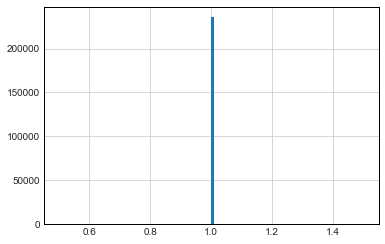

In [151]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

##### Histogram

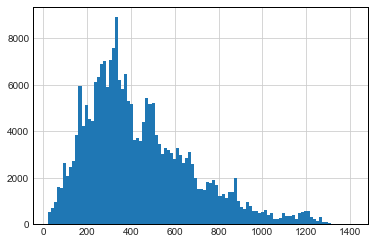

In [152]:
df.installment.hist(bins=100)

##### Meanr response

In [153]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [154]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [155]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
              "grade", "subgrade", "openacc"]
n = len(dummy_list)

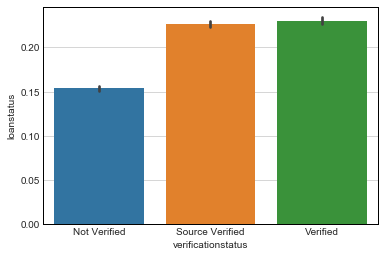

In [156]:
# why verified incomes gives higher default rates?

sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

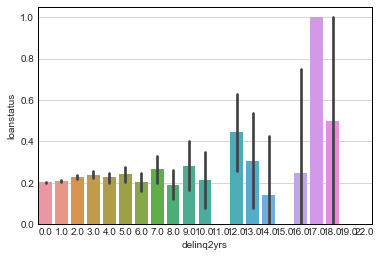

In [157]:
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)
plt.show()

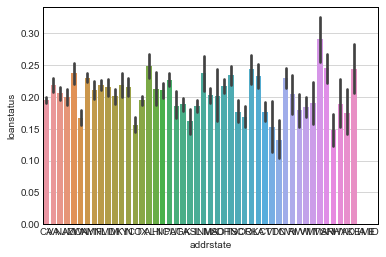

In [158]:
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)
plt.show()

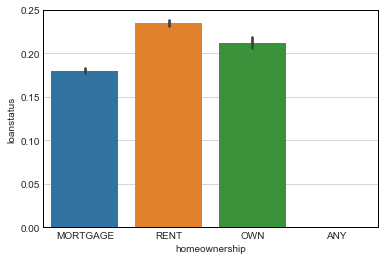

In [159]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)
plt.show()

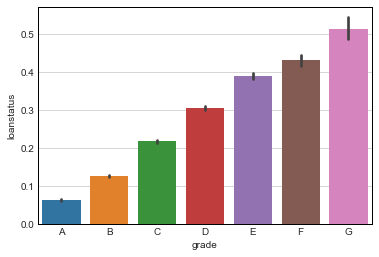

In [160]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [161]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

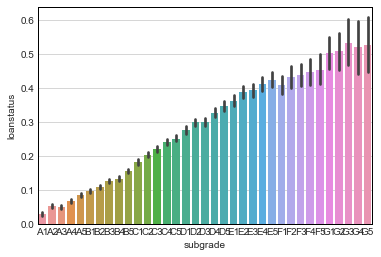

In [162]:
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))
plt.show()

In [163]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


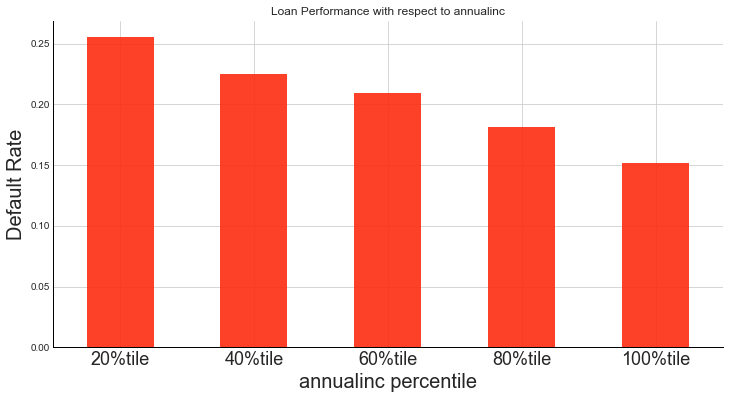

In [164]:
countinuous_variable_plot('annualinc')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


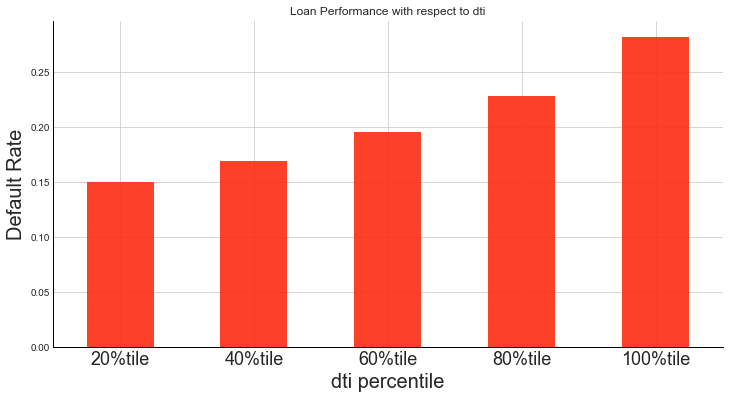

In [165]:
countinuous_variable_plot('dti')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


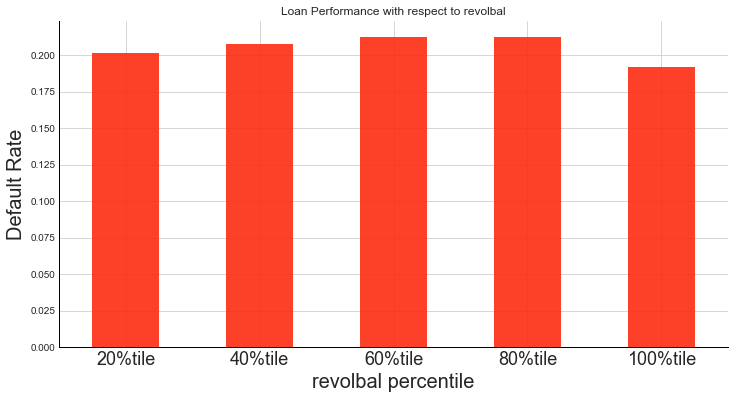

In [166]:
countinuous_variable_plot('revolbal')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


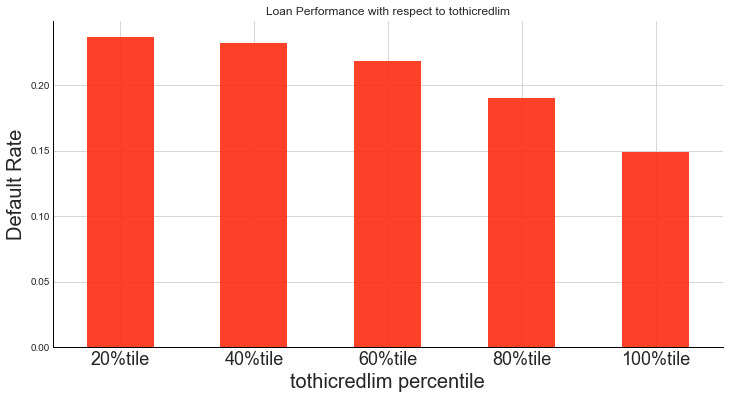

In [167]:
countinuous_variable_plot('tothicredlim')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


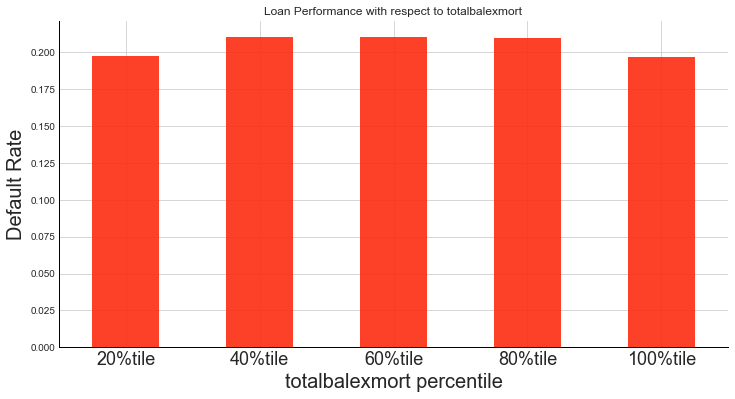

In [168]:
countinuous_variable_plot('totalbalexmort')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


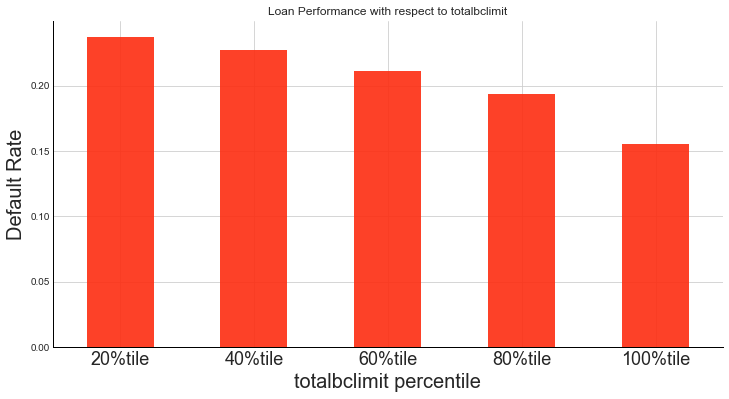

In [169]:
countinuous_variable_plot('totalbclimit')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


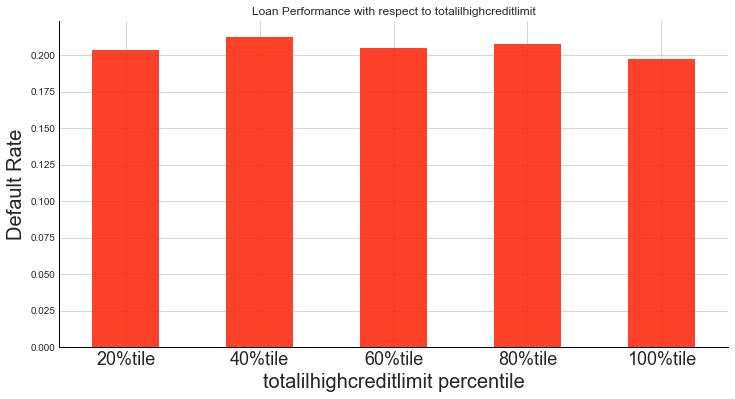

In [170]:
countinuous_variable_plot('totalilhighcreditlimit')